In [23]:
# Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Titanic-Dataset.csv'
titanic_df = pd.read_csv(path)
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [24]:
summary = titanic_df.describe(percentiles=[0.25, 0.5, 0.75, 0.9])
print(summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
max      6.

In [25]:
print("\n Names of Columns/Features in the dataset:")
print(titanic_df.columns)


 Names of Columns/Features in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


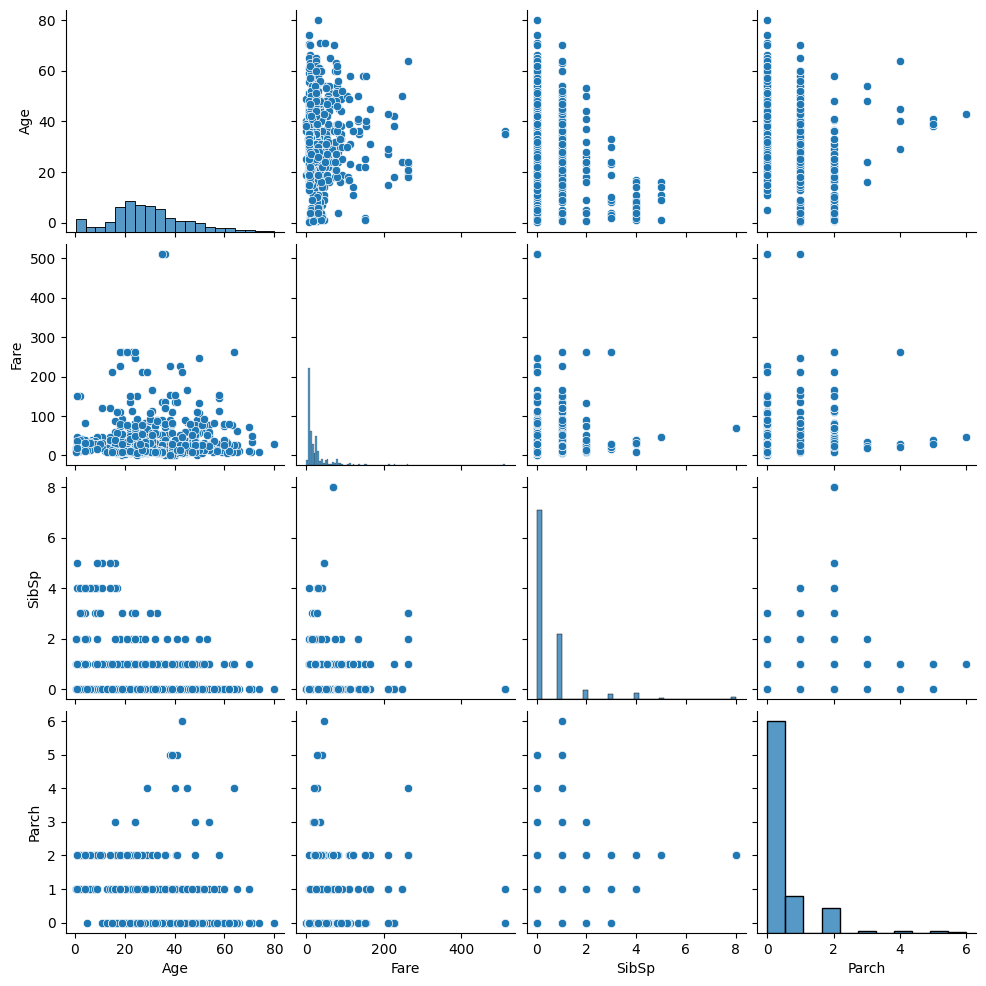

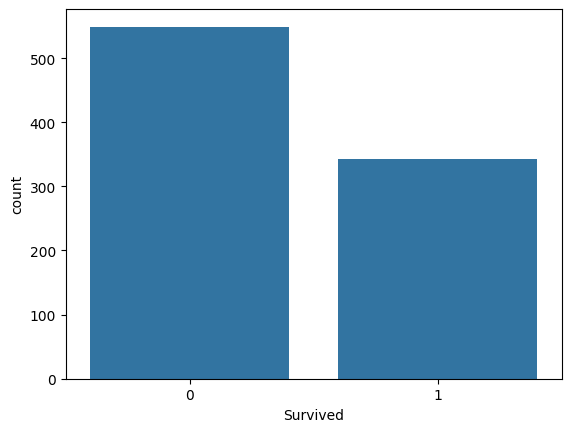

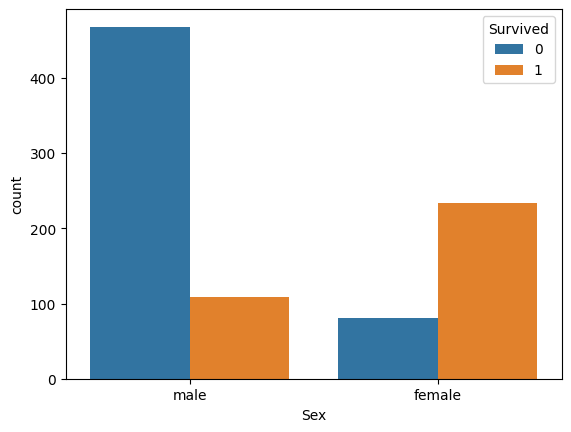

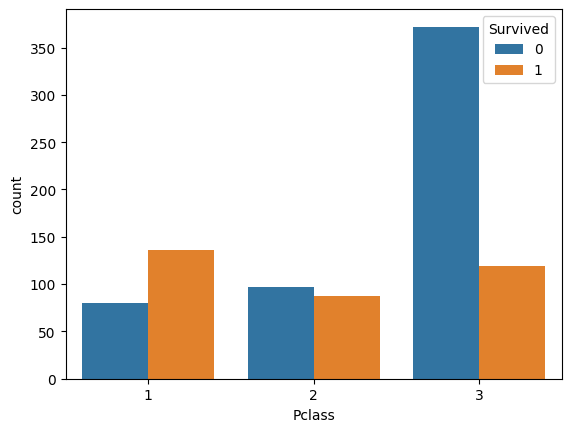

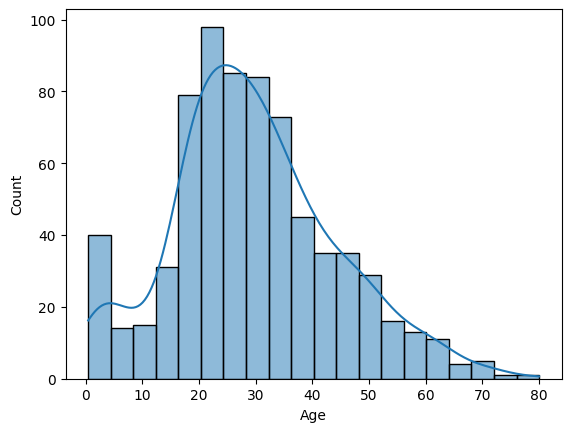

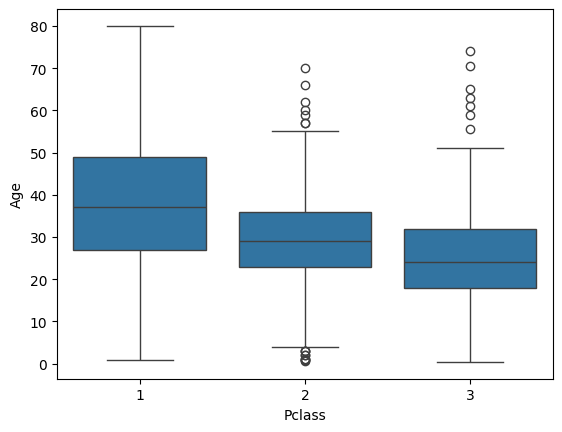

In [26]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(titanic_df[numeric_features], kind='scatter')
plt.show()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.show()

sns.histplot(titanic_df['Age'].dropna(), bins=20, kde=True)
plt.show()

sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()


In [27]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

print("\nUpdated DataFrame after Data Wrangling:")
print(titanic_df.head())



Updated DataFrame after Data Wrangling:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [28]:
# Part 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np


X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train, X_test, Y_train, Y_test)

     Pclass  Sex   Age  SibSp  Parch      Fare
331       1    0  45.5      0      0   28.5000
733       2    0  23.0      0      0   13.0000
382       3    0  32.0      0      0    7.9250
704       3    0  26.0      1      0    7.8542
813       3    1   6.0      4      2   31.2750
..      ...  ...   ...    ...    ...       ...
106       3    1  21.0      0      0    7.6500
270       1    0  28.0      0      0   31.0000
860       3    0  41.0      2      0   14.1083
435       1    1  14.0      1      2  120.0000
102       1    0  21.0      0      1   77.2875

[712 rows x 6 columns]      Pclass  Sex   Age  SibSp  Parch     Fare
709       3    0  28.0      1      1  15.2458
439       2    0  31.0      0      0  10.5000
840       3    0  20.0      0      0   7.9250
720       2    1   6.0      0      1  33.0000
39        3    1  14.0      1      0  11.2417
..      ...  ...   ...    ...    ...      ...
433       3    0  17.0      0      0   7.1250
773       3    0  28.0      0      0   7.225

In [29]:
logreg = LogisticRegression(titanic_df)
print(logreg)

LogisticRegression(penalty=     Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           0       3    0  22.0      1      0   7.2500
1           1       1    1  38.0      1      0  71.2833
2           1       3    1  26.0      0      0   7.9250
3           1       1    1  35.0      1      0  53.1000
4           0       3    0  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
886         0       2    0  27.0      0      0  13.0000
887         1       1    1  19.0      0      0  30.0000
888         0       3    1  28.0      1      2  23.4500
889         1       1    0  26.0      0      0  30.0000
890         0       3    0  32.0      0      0   7.7500

[891 rows x 7 columns])


In [30]:
logistic_model.fit(X_train, Y_train)

NameError: name 'logistic_model' is not defined

In [ ]:
penalties = np.linspace(0.01, 1, 100)

f1_scores_train = []
f1_scores_test = []

for penalty in penalties:
    logreg = LogisticRegression(C=1/penalty, solver='liblinear')
    logreg.fit(X_train, Y_train)

    # Predictions on training and test data
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test = logreg.predict(X_test)

    # Compute F1 scores and append to the lists
    f1_train = f1_score(Y_train, Y_pred_train)
    f1_test = f1_score(Y_test, Y_pred_test)
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Plot F1 scores as a function of penalty
plt.figure(figsize=(10, 5))
plt.scatter(penalties, f1_scores_train, label='F1 Train', color='blue')
plt.scatter(penalties, f1_scores_test, label='F1 Test', color='red')
plt.title('F1 Score vs Penalty')
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()